## ATP Top Rivalry (2000-2019)  
##### Analysis of top rivalries in the ATP circuit for the past decade

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#### Create single data file for years 2000-2020

In [1]:
# # create single df for tennis data from 2000-2019
# directory = "/Users/pratikrev/Desktop/Data Mining/Project/Data/Tennis Data - Men's/"

# frames = []

# for filename in sorted(os.listdir(directory)):
#     if filename.endswith((".xls", ".xlsx")):
#         year = os.path.splitext(filename)[0]
        
#         if year != '2020':
#             df = pd.read_excel(directory + filename)

#             # keep only relevant columns
#             columns = ['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
#                        'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1', 'W2', 
#                        'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets','Lsets', 'Comment']
#             df = df[columns]

#             # add year column
#             df['Year'] = year

#             # add to frames
#             frames.append(df)

# tennis_data = pd.concat(frames)

# # store as csv
file_path = "./TennisData_2000-2019.csv"
# tennis_data.to_csv(file_path, index=False)

In [172]:
# read data
tennis_data = pd.read_csv(file_path)

### Head-to-Head Wins

In [173]:
# get head-to-head winner-loser aggregation
playerH2H_win_loss = tennis_data.groupby(["Winner", "Loser"]).agg({'ATP': 'count', 'Year': 'max'}).reset_index()
playerH2H_win_loss.columns = ['Player1', 'Player2', 'Total_Player1_Wins', 'Year']

# get head-to-head loser-winner aggregation
playerH2H_loss_win = tennis_data.groupby(["Loser", "Winner"]).agg({'ATP': 'count', 'Year': 'max'}).reset_index()
playerH2H_loss_win.columns = ['Player1', 'Player2', 'Total_Player2_Wins', 'Year']

# merge data
playerH2H = playerH2H_win_loss.merge(playerH2H_loss_win, on=['Player1', 'Player2'])

playerH2H['H2H'] = playerH2H['Total_Player1_Wins'].astype(str) + " / " + playerH2H['Total_Player2_Wins'].astype(str)
playerH2H['Total'] = playerH2H['Total_Player1_Wins'] + playerH2H['Total_Player2_Wins']

playerH2H['Year'] = np.where(playerH2H['Year_x'] > playerH2H['Year_y'], playerH2H['Year_x'], playerH2H['Year_y'])

# sort player names
playerH2H['Player1'] = np.where(playerH2H['Player1'] < playerH2H['Player2'], playerH2H['Player1'], playerH2H['Player2'])
playerH2H['Player2'] = np.where(playerH2H['Player1'] > playerH2H['Player2'], playerH2H['Player1'], playerH2H['Player2'])
playerH2H['Players'] = playerH2H['Player1'].str.split(" ").str.get(0) + "-" + playerH2H['Player2'].str.split(" ").str.get(0)

# group and sort data
playerH2H =  playerH2H.groupby(['Player1', 'Player2', 'Players', 'H2H']).agg({'Total': 'max', 'Year': 'max'}).reset_index()
playerH2H = playerH2H[playerH2H['Player1'] != playerH2H['Player2']].sort_values(['Total'], ascending=False)

playerH2H['Decade'] = pd.cut(playerH2H.Year.astype(int), [1999, 2010, np.inf], labels=['2000s', '2010s'])

In [174]:
# top 10 rivalries
playerH2H.head(10)

,Player1,Player2,Players,H2H,Total,Year,Decade
3278,Djokovic N.,Nadal R.,Djokovic-Nadal,28 / 24,52,2019,2010s
3250,Djokovic N.,Federer R.,Djokovic-Federer,26 / 21,47,2019,2010s
3804,Federer R.,Nadal R.,Federer-Nadal,17 / 24,41,2019,2010s
3277,Djokovic N.,Murray A.,Djokovic-Murray,25 / 10,35,2017,2010s
3945,Ferrer D.,Nadal R.,Ferrer-Nadal,6 / 26,32,2019,2010s
3830,Federer R.,Wawrinka S.,Federer-Wawrinka,24 / 3,27,2019,2010s
1271,Berdych T.,Djokovic N.,Berdych-Djokovic,3 / 23,26,2017,2010s
7634,Murray A.,Nadal R.,Murray-Nadal,8 / 17,25,2016,2010s
3803,Federer R.,Murray A.,Federer-Murray,14 / 10,24,2015,2010s
3813,Federer R.,Roddick A.,Federer-Roddick,21 / 3,24,2012,2010s


In [175]:
tennis_data.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'Year'],
      dtype='object')

### Finals reached

In [176]:
# get only data for 'The Final' and filter data
tennis_data_finals = tennis_data[tennis_data['Round'] == 'The Final']

# finals won
player_final_won = tennis_data_finals.groupby(['Winner', 'Tournament']).agg({'ATP': 'count'}).reset_index()
player_final_won.columns = ['Player', 'Tournament', 'Count']

# finals lost
player_final_lost = tennis_data_finals.groupby(['Loser', 'Tournament']).agg({'ATP': 'count'}).reset_index()
player_final_lost.columns = ['Player', 'Tournament', 'Count']

# merge data
player_finals = player_final_won.merge(player_final_lost, on=['Player', 'Tournament'])
player_finals.columns = ['Player', 'Tournament', 'Win_Count', 'Lost_Count']
player_finals['Total_Finals'] = player_finals['Win_Count'] + player_finals['Lost_Count']

In [177]:
player_finals.sort_values('Total_Finals', ascending=False).head(10)

,Player,Tournament,Win_Count,Lost_Count,Total_Finals
67,Federer R.,Wimbledon,8,4,12
55,Federer R.,Gerry Weber Open,9,3,12
149,Nadal R.,Monte Carlo Masters,11,1,12
64,Federer R.,Swiss Indoors,7,4,11
58,Federer R.,Masters Cup,6,4,10
38,Djokovic N.,Internazionali BNL d'Italia,4,5,9
148,Nadal R.,Internazionali BNL d'Italia,7,2,9
66,Federer R.,Western & Southern Financial Group Masters,7,1,8
44,Djokovic N.,US Open,3,5,8
39,Djokovic N.,Masters Cup,5,2,7


In [178]:
# number of tournaments played and finals reached
player_finals.groupby('Player').agg({'Tournament': 'count', 'Total_Finals': 'sum'}).reset_index().sort_values('Total_Finals', ascending=False).head(10)

,Player,Tournament,Total_Finals
20,Federer R.,20,116
18,Djokovic N.,12,69
52,Nadal R.,13,60
51,Murray A.,10,28
58,Roddick A.,9,27
21,Ferrer D.,6,17
72,Tsonga J.W.,4,14
31,Hewitt L.,5,13
49,Monfils G.,4,11
16,Del Potro J.M.,5,11


### Tournaments Won

In [179]:
player_finals.sort_values('Win_Count', ascending=False).head(10)

,Player,Tournament,Win_Count,Lost_Count,Total_Finals
149,Nadal R.,Monte Carlo Masters,11,1,12
55,Federer R.,Gerry Weber Open,9,3,12
67,Federer R.,Wimbledon,8,4,12
148,Nadal R.,Internazionali BNL d'Italia,7,2,9
64,Federer R.,Swiss Indoors,7,4,11
66,Federer R.,Western & Southern Financial Group Masters,7,1,8
50,Federer R.,Australian Open,6,1,7
58,Federer R.,Masters Cup,6,4,10
43,Djokovic N.,Sony Ericsson Open,6,1,7
46,Djokovic N.,Wimbledon,5,1,6


In [180]:
player_finals.groupby('Player').agg({'Win_Count': 'sum'}).reset_index().sort_values('Win_Count', ascending=False).head(10)

,Player,Win_Count
20,Federer R.,73
18,Djokovic N.,41
52,Nadal R.,38
58,Roddick A.,17
51,Murray A.,16
21,Ferrer D.,11
72,Tsonga J.W.,9
31,Hewitt L.,7
33,Isner J.,7
50,Moya C.,7


In [181]:
# tournament wins by year
def plot_player_tournament_win_history(player):
    
    player_df = tennis_data_finals[(tennis_data_finals['Winner'] == player)].groupby(['Series','Year'], as_index=False).agg(['count'])
    player_df = player_df['ATP'].reset_index()
    
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(plt.cycler('color', plt.cm.tab10(np.linspace(0, 1, 8))))
    ax.set_xticks(np.arange(min(player_df['Year']), max(player_df['Year'])+1, 2))
    ax.set_yticks(np.arange(min(player_df['count']), max(player_df['count'])+1, 1))
    
    plt.title(player+' - Tournaments Won by Series Type')
    plt.ylabel('Tournaments Won')
    plt.xlabel('Year')
    
    # Plot tournaments by type
    plt.plot(player_df[player_df['Series']=='Grand Slam']['Year'], player_df[player_df['Series']=='Grand Slam']['count'], marker='o', markerfacecolor='black', markersize=4, linewidth=3)
    plt.plot(player_df[player_df['Series']=='Masters 1000']['Year'], player_df[player_df['Series']=='Masters 1000']['count'], linestyle='--', marker='o', markerfacecolor='darkgray')
    plt.plot(player_df[player_df['Series']=='Masters']['Year'], player_df[player_df['Series']=='Masters']['count'], linestyle='dotted', marker='o', markerfacecolor='grey')
    plt.plot(player_df[player_df['Series']=='Masters Cup']['Year'], player_df[player_df['Series']=='Masters Cup']['count'], linestyle='dotted', marker='o', markerfacecolor='grey')
    plt.plot(player_df[player_df['Series']=='ATP500']['Year'], player_df[player_df['Series']=='ATP500']['count'], linestyle='dotted', marker='o', markerfacecolor='grey')
    plt.plot(player_df[player_df['Series']=='ATP250']['Year'], player_df[player_df['Series']=='ATP250']['count'], linestyle='dotted', marker='o', markerfacecolor='grey')
    plt.plot(player_df[player_df['Series']=='International']['Year'], player_df[player_df['Series']=='International']['count'], linestyle='dotted', marker='o', markerfacecolor='grey')
    plt.plot(player_df[player_df['Series']=='International Gold']['Year'], player_df[player_df['Series']=='International Gold']['count'], linestyle='dotted', marker='o', markerfacecolor='grey')
    
    plt.legend(['Grand Slam', 'Masters 1000', 'Masters', 'Masters Cup', 'ATP500', 'ATP250', 'International', 'International Gold'], loc='best', prop={'size': 10})

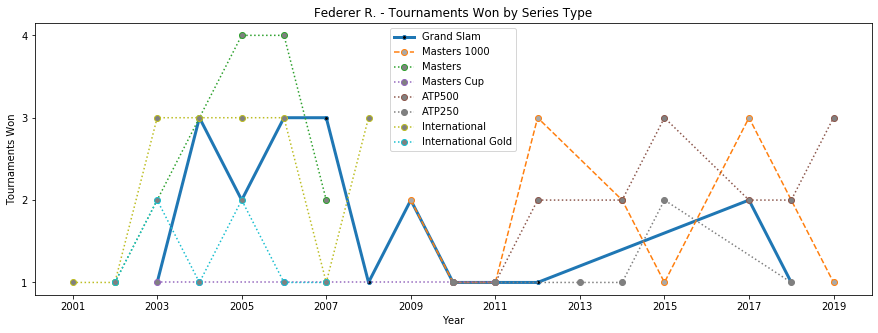

In [182]:
plot_player_tournament_win_history('Federer R.')

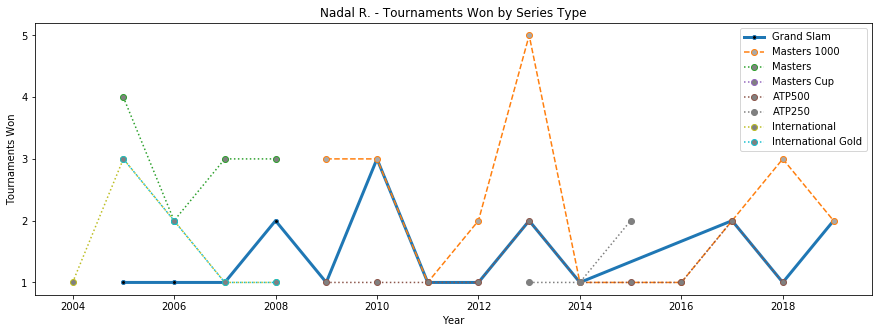

In [183]:
plot_player_tournament_win_history('Nadal R.')

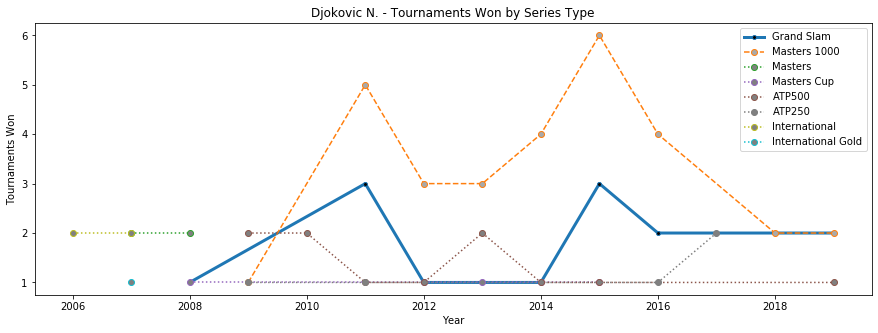

In [184]:
plot_player_tournament_win_history('Djokovic N.')

### Most Grand Slam Wins  
(Australian Open, French Open, Wimbledon, US Open)

In [185]:
# get only data for GS and filter data
tennis_data_GS = tennis_data_finals[(tennis_data_finals['Tournament'].isin(['Australian Open','French Open',
                                                                            'Wimbledon','US Open']))]

# GS finals won
player_GS_final_won = tennis_data_GS.groupby(['Winner', 'Tournament']).agg({'ATP': 'count'}).reset_index()
player_GS_final_won.columns = ['Player', 'Grand Slam', 'Count']
player_GS_final_won = player_GS_final_won.sort_values('Count', ascending=False)

In [186]:
# by GS
player_most_GS = tennis_data_GS.groupby(['Winner'])['Tournament'].count().reset_index().sort_values('Tournament', ascending=False)
player_most_GS.columns = ['Player', 'GS_Wins']
player_most_GS

,Player,GS_Wins
5,Federer R.,20
13,Nadal R.,19
4,Djokovic N.,16
0,Agassi A.,3
12,Murray A.,3
17,Wawrinka S.,3
8,Hewitt L.,2
11,Kuerten G.,2
15,Safin M.,2
16,Sampras P.,2


In [187]:
# by player GS records
player_GS_final_won.head(10)

,Player,Grand Slam,Count
22,Nadal R.,French Open,12
11,Federer R.,Wimbledon,8
4,Djokovic N.,Australian Open,7
8,Federer R.,Australian Open,6
10,Federer R.,US Open,5
7,Djokovic N.,Wimbledon,5
23,Nadal R.,US Open,4
0,Agassi A.,Australian Open,3
6,Djokovic N.,US Open,3
20,Murray A.,Wimbledon,2


### Ranking evolution in GS and Masters 1000 tournaments

WRank = ATP Entry ranking of the match winner as of the start of the tournament

In [386]:
# GS winners
ranking_GS = tennis_data_finals[(tennis_data_finals['Series'] == 'Grand Slam')]
ranking_GS_won = ranking_GS.groupby(['Winner', 'Tournament', 'WRank', 'Year'])['ATP'].count().reset_index().sort_values('Year')
ranking_GS_won['WRank'] = ranking_GS_won['WRank'].apply(pd.to_numeric).astype(int)


# Masters 1000 winners (2009 - 2019)
ranking_M1000 = tennis_data_finals[(tennis_data_finals['Series'] == 'Masters 1000')]
ranking_M1000_won = ranking_M1000.groupby(['Winner', 'Tournament', 'WRank', 'Year'])['ATP'].count().reset_index().sort_values('Year')
ranking_M1000_won['WRank'] = ranking_M1000_won['WRank'].apply(pd.to_numeric).astype(int)

In [387]:
# ranking evolution
def plot_player_rank_evol(player, series):
    
    player_df = tennis_data_finals[(tennis_data_finals['Winner'] == player)].groupby(['Winner', 'Series', 'Tournament', 'WRank', 'Year'])['ATP'].count().reset_index().sort_values('Year')
    player_df['WRank'] = player_df['WRank'].apply(pd.to_numeric).astype(int)
    
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    ax.set_prop_cycle(plt.cycler('color', plt.cm.Pastel2(np.linspace(0, 1, 2))))
    ax.set_xticks(np.arange(min(player_df['Year']), max(player_df['Year'])+1, 2))
    ax.set_yticks(np.arange(min(player_df['WRank']), max(player_df['WRank'])+1, 1))
    
    plt.title(player+' - ATP Rank at GS by Year')
    plt.ylabel('Player Rank')
    plt.xlabel('Year')
    
    # Plot ranking evolution for GS or Masters 1000 tournaments
    if series == 'GS':
        x = player_df[player_df['Tournament'].isin(['Australian Open','French Open','Wimbledon','US Open'])]['Year']
        y = player_df[player_df['Tournament'].isin(['Australian Open','French Open','Wimbledon','US Open'])]['WRank']
        z = player_df[player_df['Tournament'].isin(['Australian Open','French Open','Wimbledon','US Open'])]['Tournament']
        plt.plot(x, y, linewidth=3, marker='o', markerfacecolor='black')

        cords = []
        for idx, val in x.items():
            y_plt = y[idx]
            if (x[idx],y[idx]) in cords:
                y_plt = y[idx] + 1
            plt.annotate(z[idx], (x[idx], y_plt)) 
            cords.append((x[idx],y[idx]))
            cords.append((x[idx],y[idx]+1))
        
        plt.legend(['Grand Slams'], loc='upper center', prop={'size': 10})
    
    if series == 'MS1000':
        x = player_df[player_df['Series']=='Masters 1000']['Year']
        y = player_df[player_df['Series']=='Masters 1000']['WRank']
        z = player_df[player_df['Series']=='Masters 1000']['Tournament']
        plt.plot(x, y, linestyle='--', marker='o', markerfacecolor='black')
        cords = []
        for idx, val in x.items():
            y_plt = y[idx]
            if (x[idx],y[idx]) in cords:
                y_plt = y[idx] + 1
            plt.annotate(z[idx], (x[idx], y_plt)) 
            cords.append((x[idx],y[idx]))
            cords.append((x[idx],y[idx]+1))
    
        plt.legend(['Masters 1000'], loc='upper center', prop={'size': 10})

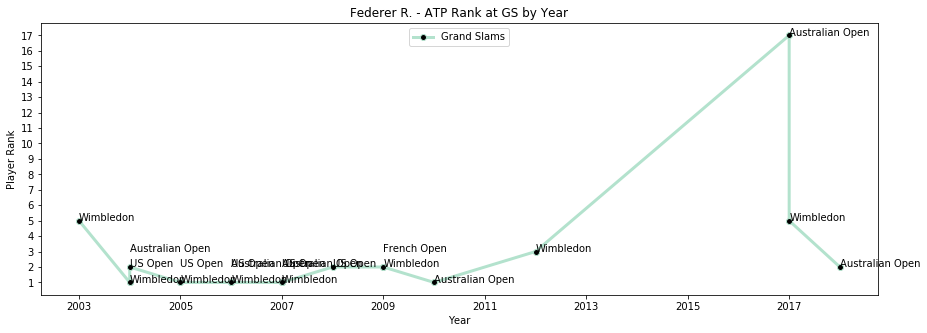

In [388]:
plot_player_rank_evol('Federer R.', 'GS')

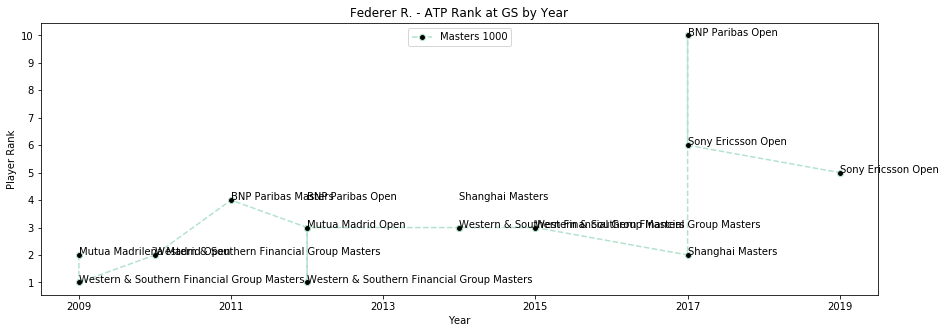

In [389]:
plot_player_rank_evol('Federer R.', 'MS1000')

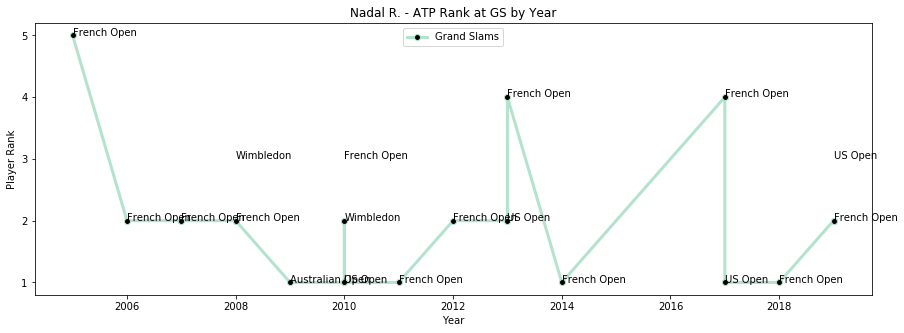

In [390]:
plot_player_rank_evol('Nadal R.', 'GS')

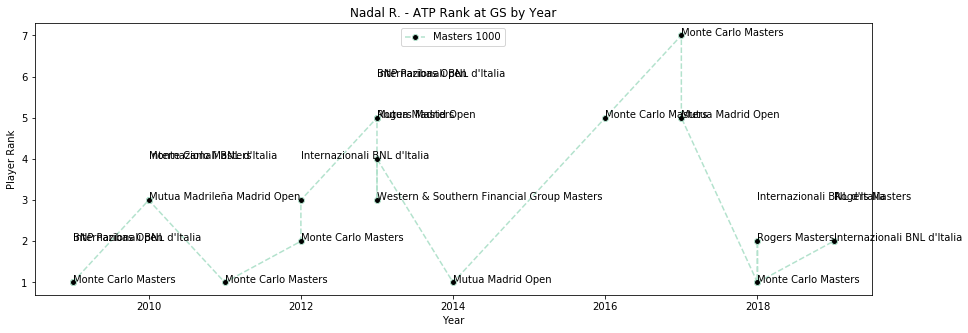

In [391]:
plot_player_rank_evol('Nadal R.', 'MS1000')

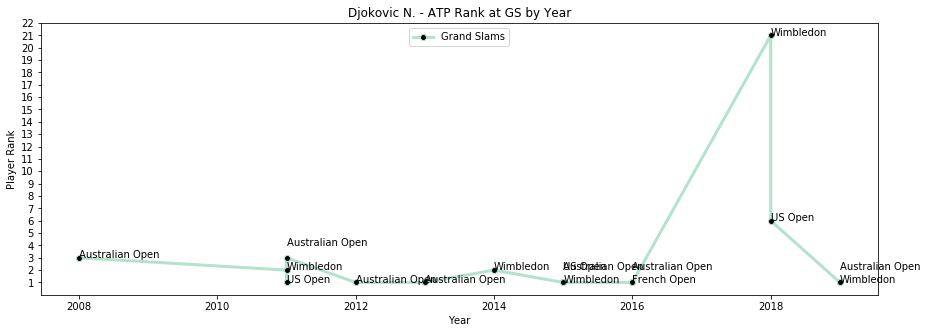

In [395]:
plot_player_rank_evol('Djokovic N.', 'GS')

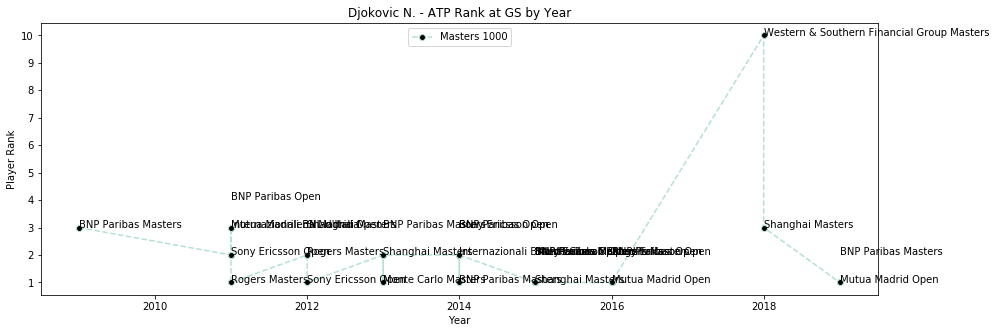

In [396]:
plot_player_rank_evol('Djokovic N.', 'MS1000')

In [397]:
ranking_GS_won[ranking_GS_won['Winner'].isin(['Federer R.', 'Nadal R.', 'Djokovic N.'])]

,Winner,Tournament,WRank,Year,ATP
41,Federer R.,Wimbledon,5,2003,1
27,Federer R.,Australian Open,2,2004,1
30,Federer R.,US Open,1,2004,1
37,Federer R.,Wimbledon,1,2004,1
36,Federer R.,Wimbledon,1,2005,1
29,Federer R.,US Open,1,2005,1
65,Nadal R.,French Open,5,2005,1
24,Federer R.,Australian Open,1,2006,1
31,Federer R.,US Open,1,2006,1
61,Nadal R.,French Open,2,2006,1
